In [1]:
#import jhu
import pandas as pd
import covid.util as util
util.load_world_data()


Bad key "nbagg.transparent" on line 426 in
/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.2.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key "animation.mencoder_path" on line 509 in
/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.2.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key "animation.mencoder_args" on line 512 in
/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle.
You probably need to get an update

{'Afghanistan': {'data':             confirmed  deaths
  2020-01-22          0       0
  2020-01-23          0       0
  2020-01-24          0       0
  2020-01-25          0       0
  2020-01-26          0       0
  ...               ...     ...
  2020-04-25       1463      47
  2020-04-26       1531      50
  2020-04-27       1703      57
  2020-04-28       1828      58
  2020-04-29       1939      60
  
  [99 rows x 2 columns], 'name': 'Afghanistan', 'pop': 34656032.0},
 'Albania': {'data':             confirmed  deaths
  2020-01-22          0       0
  2020-01-23          0       0
  2020-01-24          0       0
  2020-01-25          0       0
  2020-01-26          0       0
  ...               ...     ...
  2020-04-25        712      27
  2020-04-26        726      28
  2020-04-27        736      28
  2020-04-28        750      30
  2020-04-29        766      30
  
  [99 rows x 2 columns], 'name': 'Albania', 'pop': 2876101.0},
 'Algeria': {'data':             confirmed  deaths
  

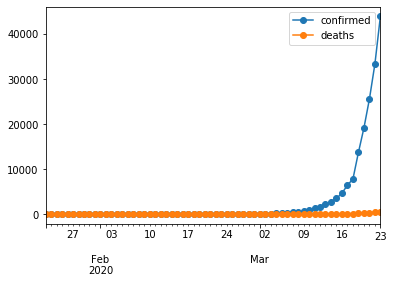

In [21]:
world = jhu.load_world()
world.US.tot.plot(style='-o')
plt.show()

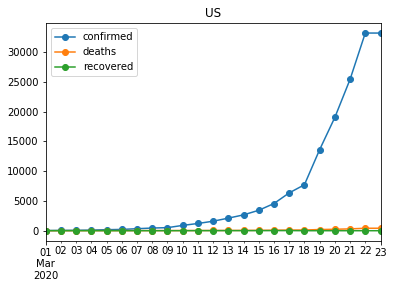

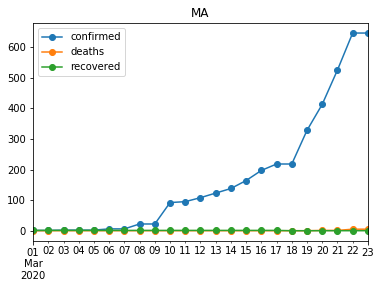

In [22]:
US = jhu.load_us()
start = pd.Timestamp('2020-03-01')

US['tot'][start:].plot(style='o-')
plt.title('US')
plt.show()

US['MA'][start:].plot(style='o-')
plt.title('MA')
plt.show()
